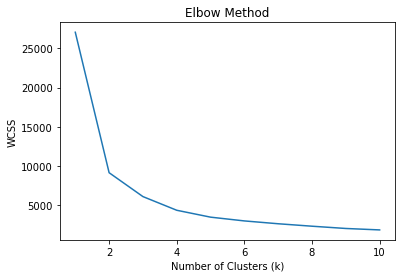

           DISTRICT    Cluster Label
0          ADILABAD  Sensitive Areas
1         ANANTAPUR  Sensitive Areas
2          CHITTOOR  Sensitive Areas
3          CUDDAPAH  Sensitive Areas
4     EAST GODAVARI  Sensitive Areas
...             ...              ...
9012    LAKSHADWEEP  Sensitive Areas
9013          TOTAL  Sensitive Areas
9014       KARAIKAL  Sensitive Areas
9015     PUDUCHERRY  Sensitive Areas
9016          TOTAL  Sensitive Areas

[9017 rows x 2 columns]


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the crime datasets into a consolidated DataFrame
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

# Select relevant columns and preprocess the data
features = ['DISTRICT', 'MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION']  # Adjust with appropriate column names
data = df[features].copy()

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('DISTRICT', axis=1))

# Determine the optimal number of clusters using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Choose the optimal number of clusters based on the elbow curve analysis
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
data['Cluster'] = clusters
data['DISTRICT'] = df['DISTRICT']  # Add the 'DISTRICT' column back

# Analyze the clusters
cluster_analysis = data.groupby('Cluster').mean()

# Assign cluster labels based on analysis (Sensitive, Moderate, Peaceful)
cluster_labels = {
    0: 'Sensitive Areas',
    1: 'Moderate Areas',
    2: 'Peaceful Areas'
}
data['Cluster Label'] = data['Cluster'].map(cluster_labels)

# Display the resulting DataFrame with cluster information
print(data[['DISTRICT', 'Cluster Label']])  # Modify with the desired columns to display





In [3]:
# Create separate DataFrames for each cluster
sensitive_areas_df = data[data['Cluster Label'] == 'Sensitive Areas']
moderate_areas_df = data[data['Cluster Label'] == 'Moderate Areas']
peaceful_areas_df = data[data['Cluster Label'] == 'Peaceful Areas']

# Display the DataFrames for each cluster
print("Sensitive Areas:")
print(sensitive_areas_df)
print("\nModerate Areas:")
print(moderate_areas_df)
print("\nPeaceful Areas:")
print(peaceful_areas_df)


Sensitive Areas:
           DISTRICT  MURDER  RAPE  KIDNAPPING & ABDUCTION  Cluster  \
0          ADILABAD     101    50                      46        0   
1         ANANTAPUR     151    23                      53        0   
2          CHITTOOR     101    27                      59        0   
3          CUDDAPAH      80    20                      25        0   
4     EAST GODAVARI      82    23                      49        0   
...             ...     ...   ...                     ...      ...   
9012    LAKSHADWEEP       0     0                       0        0   
9013          TOTAL       0     0                       0        0   
9014       KARAIKAL       5     6                       2        0   
9015     PUDUCHERRY      24     7                      17        0   
9016          TOTAL      29    13                      19        0   

        Cluster Label  
0     Sensitive Areas  
1     Sensitive Areas  
2     Sensitive Areas  
3     Sensitive Areas  
4     Sensitive Areas 